By the grace of Almighty 

# first assignment, forward propagation manually, Very basic implementation

In [ ]:
# 22 january 
"""
 Here simply I have taken a input matrix with 4 training sets using Numpy . 
 #ndim is used for checking dimension
 #shape is used for checking shape
 #I have initialized weights and bias and define a activation function entitled by sigmoid and I have pass my output (z1) into that activation function!

This segment is just for forward part but this my first attempt for implementating my neural network implementation journey 
"""
#In the next segment, I am going to implement Forward and Backward propagation by using a Neural network class manually and I will plot error !!!!

'\n Here simply I have taken a input matrix with 4 training sets using Numpy . \n #ndim is used for checking dimension\n #shape is used for checking shape\n #I have initialized weights and bias and define a activation function entitled by sigmoid and I have pass my output (z1) into that activation function!\n\nThis segment is just for forward part but this the first attempt for implementating my neural network implementation journey \n'

In [ ]:
import numpy as np
import math 



In [ ]:
X=np.array([[4,3,1],
            [5,6,2],
            [6,7,3],
            [7,9,4]])
np.ndim(X) #check dimension
np.shape(X)#check shape

(4, 3)

In [ ]:
#Weight matrix and bias initialization
W1 = np.array([[1,4,6,9],
               [2,5,7,10],
               [3,6,8,11]]) 
b1 = np.array([[5],
               [6],
               [7]])

In [ ]:
#for first layer........................................................................
z1 = np.dot(W1,X)+b1
def sigmoid(z1):
  return 1/(1+(np.exp(-z1)))
activation_function1 = sigmoid(z1)

In [ ]:
#2nd layer.........
w2=np.array([[1,3,5],
             [2,4,6]])
b2= np.array([[5,5,5],
              [6,6,6]])
z2=np.dot(w2,activation_function1)+b2
def sigmoid(z2):
  return 1/(1+(np.exp(-z2)))
activation_function2 = sigmoid(z2)

In [ ]:
#3rd layer
w3 = np.array([[1,2]])
b3 = np.array([[5,5,5]])
z3=np.dot(w3,activation_function2)+b3
def sigmoid(z3):
  return 1/(1+(np.exp(-z3)))
activation_function3 = sigmoid(z3)
print(activation_function3) 

[[0.99966465 0.99966465 0.99966465]]


# Neural Network Implementation using backpropagation manually

""" Here I have tried to implement a simple neural network using backpropagation according to our class lectures.


Mainly I have divided this work by  6 parts (initialization, create neural network class, forward pass, backward pass, call forward and backward pass, plotting ) 

1)	taking input, target, bias, weights manually using Numpy array

2)	Create Neural Network class 

3)	In Neural Network class I have defined an activation class (sigmoid), an error_check class which returns error. Then I have taken a feed_forward function where I calculate output of each hidden layer and pass the activation function of hidden layer to next hidden layer ,then output layer ! Finally I get my final output from output layer. Then I calculate error (difference between actual output {target} and predicted output {a_output} )

4)	Henceforth I have taken a backwardpropagation function. Here, I have updated my hidden and output layer’s weight and then return those updated weights.

5)	I have taken a Neural Network object (NN) and I have taken two empty list. One (loss) for storing every iteration’s error and another list (epoch) just store iteration number. Then I run a for loop with range 100 and  call feed_forward and backpropagation and append error and iteration no.

6)	Then I have plotted iteration vs error ! 



For this assignment coursera course " Neural Networks and Deep Learning" by Andrew Ng helps me a lot to properly understand chain rule.

Apart from this I have taken help from two youtube tutorial:
1) https://www.youtube.com/watch?v=7qYtIveJ6hU&t=1660s - helps me to do code
2)https://www.youtube.com/watch?v=QZ8ieXZVjuE - helps me to understand theory 

Apart from three of my friends(Ahasanul Alam, Sanzida akter and Maksudur rahman  ) help me a lots  to understand 

backpropagation concept.

3) https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/ - provided by Ahasanul Alam

February 16

"""


In [ ]:
#import necessary Libraries
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
#show neural network graph

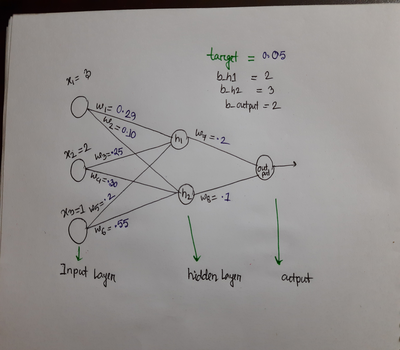

In [ ]:
"""
taking input and bias 

"""
#x=np.array([3,2,1]).reshape(3,1)
#print("print training set",x)

x=np.array([[4,3,1],
            [5,6,2],
            [6,7,3],
            [7,1,2]])



In [ ]:
#bias for hidden layer's node
b_hidden_layer=np.array([.2,.13]).reshape(2,1)
print("bias :",b_hidden_layer)
b_output_layer=2
#let take a value for learning rate
l_r=0.001
target=np.array([0.2,0.06,0.09])

bias : [[0.2 ]
 [0.13]]


In [ ]:
class NeuralNetwork(object):

  def sigmoid(self,a):
    z = a
    return 1/(1+(np.exp(-z)))
  
  #error=(target-a_output)**2
  def error_check(self):
    return self.error

#let's do feed forward
#here 1st 6 weights use between input layer to hidden layer and rest 2 use as last layer's weight

  def feed_forward(self,w1,w2,w3,w4,w5,w6,w7,w8):
    w_hidden_layer= np.array([[w1,w3,w5],[w2,w4,w6]])
    #print("weight between input layer and hidden layer are: ",w_hidden_layer)

    #hidden layer calculation
    self.h1=np.dot(w_hidden_layer[0],x[0])+b_hidden_layer[0]
    self.h2=np.dot(w_hidden_layer[1],x[0])+b_hidden_layer[1]
    #print net value of 1st node at hidden layer
    #print("net value of h1: ",self.h1)
    #print net value of 2nd node at hidden layer
    #print("net value of h2: ",self.h2)

    self.a_h1=self.sigmoid(self.h1)
    self.a_h2=self.sigmoid(self.h2)


    #output layer calculation
    w_output_layer=np.array([w7,w8])
    #print("weight between hidden layer and output layer are: ",w_output_layer)
    in_output_layer=np.array([self.a_h1,self.a_h2]).reshape(2,1)

    self.output=np.dot(w_output_layer,in_output_layer)+b_output_layer
    a_output=self.sigmoid(self.output)
    
    #error
    self.error= (a_output-target)**2

    return a_output



#let's do Backpropagation
  def backpropagation(self,w1,w2,w3,w4,w5,w6,w7,w8,a_output):
     w_hidden_layer= np.array([[w1,w3,w5],[w2,w4,w6]])
     w_output_layer=np.array([w7,w8])
     
     w=np.array([])
     w_h=np.array([])

     
     self.e_der_r_output = a_output - target
     #print("error",e_der_r_output)

     output_r_h1 = a_output*(1-a_output)
     h1_r_w7 = self.a_h1

     output_r_h2 = a_output*(1-a_output)
     h1_r_w8 = self.a_h2

     #for updating w7
     e_der_respect_w7= self.e_der_r_output *output_r_h1*h1_r_w7
     new_w7 = self.a_h1 - l_r*(e_der_respect_w7)
     w=np.append(w,[new_w7])
    
     #for updating w8
     e_der_respect_w8= self.e_der_r_output *output_r_h2*h1_r_w8
     e_der_respect_w8

     new_w8 = self.a_h2 - l_r*(e_der_respect_w8)
     w=np.append(w,[new_w8])


    
     #for updating w1
     e_der_r_output= a_output-target
     output_r_h1 = a_output*(1-a_output)
     h1_r_w7=w_output_layer[0]
     e_der_r_a_h1 = e_der_r_output * output_r_h1 *h1_r_w7
     a_h1_der_r_h1= self.a_h1*(1-self.a_h1)
     h1_der_r_w1 = x[0]
     e_r_w1 = e_der_r_a_h1 * a_h1_der_r_h1 * h1_der_r_w1
     new_w1 = w_hidden_layer[0][0] - (l_r*(e_r_w1 ))
     w_h=np.append(w_h,[new_w1])

     #for updating w2
     e_der_r_output= a_output-target
     output_r_h2 = a_output*(1-a_output)
     h2_r_w8=w_output_layer[1]
     e_der_r_a_h2 = e_der_r_output * output_r_h2 *h2_r_w8
     a_h2_der_r_h2= self.a_h2*(1-self.a_h2)
     h2_der_r_w2 = x[0]
     e_r_w2 = e_der_r_a_h2 * a_h2_der_r_h2 * h2_der_r_w2
     new_w2 = w_hidden_layer[1][0] - (l_r*(e_r_w2 ))
     w_h=np.append(w_h,[new_w2])


     #for updating w3
     e_der_r_output= a_output-target
     output_r_h1 = a_output*(1-a_output)
     h1_r_w7=w_output_layer[0]
     e_der_r_a_h1 = e_der_r_output * output_r_h1 * h1_r_w7
     a_h1_der_r_h1 = self.a_h1*(1-self.a_h1)
     h1_der_r_w3 = x[1]
     e_r_w3 = e_der_r_a_h1 * a_h1_der_r_h1 * h1_der_r_w3
     new_w3 = w_hidden_layer[0][1] - (l_r*(e_r_w3 ))
     w_h=np.append(w_h,[new_w3])

     #for updating w4
     e_der_r_output= a_output-target
     output_r_h2 = a_output*(1-a_output)
     h2_r_w8 = w_output_layer[1]
     e_der_r_a_h2 = e_der_r_output * output_r_h2 *h2_r_w8
     a_h2_der_r_h2= self.a_h2*(1-self.a_h2)
     h2_der_r_w4 = x[1]
     e_r_w4 = e_der_r_a_h2 * a_h2_der_r_h2 * h2_der_r_w4
     new_w4 = w_hidden_layer[1][1] - (l_r*(e_r_w4 ))
     w_h=np.append(w_h,[new_w4])

     #for updating w5
     e_der_r_output= a_output-target
     output_r_h1 = a_output*(1-a_output)
     h1_r_w7 = w_output_layer[0]
     e_der_r_a_h1 = e_der_r_output * output_r_h1 * h1_r_w7
     a_h1_der_r_h1 = self.a_h1*(1-self.a_h1)
     h1_der_r_w5 = x[2]
     e_r_w5 = e_der_r_a_h1 * a_h1_der_r_h1 * h1_der_r_w5
     new_w5 = w_hidden_layer[0][2] - (l_r*(e_r_w5 ))
     w_h=np.append(w_h,[new_w5])

    #for updating 6 
     e_der_r_output= a_output-target
     output_r_h2 = a_output*(1-a_output)
     h2_r_w8 = w_output_layer[1]
     e_der_r_a_h2 = e_der_r_output * output_r_h2 *h2_r_w8
     a_h2_der_r_h2= self.a_h2*(1-self.a_h2)
     h2_der_r_w6 = x[2]

     e_r_w6 = e_der_r_a_h2 * a_h2_der_r_h2 * h2_der_r_w6


     new_w6 = w_hidden_layer[1][2] - (l_r*(e_r_w6 ))
     w_h=np.append(w_h,[new_w6])
     #print("update weight for hidden layer are: ",w_h)
     
     #print("update weight for hidden layer are: ",w)

     return w,w_h

NN=NeuralNetwork()
w1,w2,w3,w4,w5,w6,w7,w8 = 0.29,.10,.25,.30,.2,.55,.2,.1
out=NN.feed_forward(w1,w2,w3,w4,w5,w6,w7,w8)
new_w,new=NN.backpropagation(w1,w2,w3,w4,w5,w6,w7,w8,out)
loss = []
epoch =[]


for i in range(100):
  u_w1=new[0]
  u_w2=new[1]
  u_w3=new[2]
  u_w4=new[3]
  u_w5=new[4]
  u_w6=new[5]
  u_w7=new_w[0]
  u_w8=new_w[1]
  out=NN.feed_forward(u_w1,u_w2,u_w3,u_w4,u_w5,u_w6,u_w7,u_w8)
  #plt.scatter(i,loss)
  new_w,new=NN.backpropagation(u_w1,u_w2,u_w3,u_w4,u_w5,u_w6,u_w7,u_w8,out)
  error = NN.error_check()
  loss.append(error)
  epoch.append(i)


  if(i%10==0):
    print("print error after 10 steps: ",error)
   
print(out)
print(loss)     

print error after 10 steps:  [0.59802881 0.83415932 0.78025992]
print error after 10 steps:  [0.6022877  0.83918785 0.78512353]
print error after 10 steps:  [0.60228422 0.83918375 0.78511956]
print error after 10 steps:  [0.60228075 0.83917964 0.78511559]
print error after 10 steps:  [0.60227727 0.83917554 0.78511162]
print error after 10 steps:  [0.60227379 0.83917143 0.78510765]
print error after 10 steps:  [0.6022703  0.83916732 0.78510367]
print error after 10 steps:  [0.60226682 0.8391632  0.78509969]
print error after 10 steps:  [0.60226333 0.83915908 0.78509571]
print error after 10 steps:  [0.60225984 0.83915496 0.78509172]
[0.97605199]
[array([0.59802881, 0.83415932, 0.78025992]), array([0.60132887, 0.83805598, 0.78402874]), array([0.60229044, 0.83919109, 0.78512667]), array([0.60229013, 0.83919071, 0.7851263 ]), array([0.60228978, 0.8391903 , 0.78512591]), array([0.60228943, 0.83918989, 0.78512551]), array([0.60228908, 0.83918948, 0.78512511]), array([0.60228874, 0.83918907, 

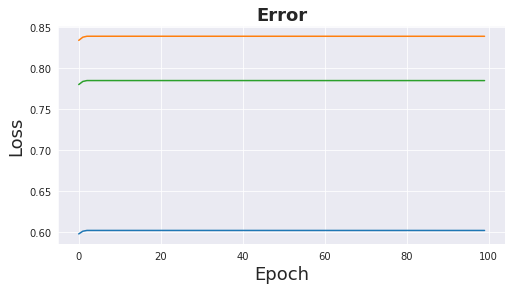

In [ ]:
import matplotlib.pyplot as plt

#sns.set_style("darkgrid")
plt.figure(figsize = (8,4))
plt.plot(epoch,loss)
plt.title("Error",fontsize=18, fontweight='bold')
plt.xlabel('Epoch',fontsize=18)
plt.ylabel('Loss',fontsize=18)
plt.show()

# Data preprocessing using a stock market dataset collected from dhaka stock exchange !

In this segment I have just tried some preprocessing collecting a raw dataset from dhaka sctock exchange . I have worked with ACI company's data (date from 3rd January,2021 to 4th April,2022). 
Anyone can collect raw data from DSE from their data archive option!
Link: https://www.dsebd.org/data_archive.php

Actually for my final implementation I don't use this dataset. I have just explored this dataset for learning purpose and enrich my knowledge about data preprocessing. Exploring this dataset, I have come to know about:

1)manually scaling using Lambda function.
2)One hot encoding (I apply encoding technique at 'TRADING CODE' feature.
3)Replace ',' with empty space. (I apply this at ''VOLUME' column).

In the upcoming section, I have implemented my Final Neural Network Implementation using Pytorch with another stock exchange dataset ! 

In [ ]:
#march 22

import math
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch import nn
import torch.nn.functional as Fun
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df=pd.read_csv("/content/ACI.csv")

In [ ]:
df['VOLUME'] = df['VOLUME'].str.replace(',','').astype(float)


In [ ]:
df['VOLUME'].min()
df['VOLUME'].max()
df['VOLUME'] = df['VOLUME'].apply(lambda v: (v - df['VOLUME'].min()) / (df['VOLUME'].max() - df['VOLUME'].min()))

In [ ]:
output = df.drop(['#','DATE','TRADING CODE','LTP*','HIGH','LOW','OPENP*','CLOSEP*','YCP','VALUE (mn)','TRADE'],axis=1)
#output

In [ ]:
############# Input processing start from here ##############
df['LTP*'].min()
df['LTP*'].max()
df['LTP*'] = df['LTP*'].apply(lambda v: (v - df['LTP*'].min()) / (df['LTP*'].max() - df['LTP*'].min()))

df['HIGH'].min()
df['HIGH'].max()
df['HIGH'] = df['HIGH'].apply(lambda v: (v - df['HIGH'].min()) / (df['HIGH'].max() - df['HIGH'].min()))

df['LOW'].min()
df['LOW'].max()
df['LOW'] = df['LOW'].apply(lambda v: (v - df['LOW'].min()) / (df['LOW'].max() - df['LOW'].min()))

df['OPENP*'].min()
df['OPENP*'].max()
df['OPENP*'] = df['OPENP*'].apply(lambda v: (v - df['OPENP*'].min()) / (df['OPENP*'].max() - df['OPENP*'].min()))

df['CLOSEP*'].min()
df['CLOSEP*'].max()
df['CLOSEP*'] = df['CLOSEP*'].apply(lambda v: (v - df['CLOSEP*'].min()) / (df['CLOSEP*'].max() - df['CLOSEP*'].min()))

df['YCP'].min()
df['YCP'].max()
df['YCP'] = df['YCP'].apply(lambda v: (v - df['YCP'].min()) / (df['YCP'].max() - df['YCP'].min()))

df['VALUE (mn)'].min()
df['VALUE (mn)'].max()
df['VALUE (mn)'] = df['VALUE (mn)'].apply(lambda v: (v - df['VALUE (mn)'].min()) / (df['VALUE (mn)'].max() - df['VALUE (mn)'].min()))

In [ ]:
input = df.drop(['#','DATE','TRADE','VOLUME'],axis=1)

#input.head()

In [ ]:
'''ct =ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0]],remainder="passthrough")
input = np.array(ct.fit_transform(input))'''

ct =ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder="passthrough")
input = np.array(ct.fit_transform(input))
print(input)


[[1.         0.82665128 0.82118451 ... 0.49664992 0.51172529 0.03374713]
 [1.         0.83068936 0.83599089 ... 0.51172529 0.54271357 0.03802749]
 [1.         0.84164984 0.83912301 ... 0.54271357 0.53350084 0.05436512]
 ...
 [1.         0.7124315  0.71611617 ... 0.16834171 0.17671692 0.06118585]
 [1.         0.71646957 0.71298405 ... 0.17671692 0.17922948 0.06196259]
 [1.         0.71733487 0.72266515 ... 0.17922948 0.15661642 0.09183779]]


In [ ]:

x_train,x_test,y_train,y_test = train_test_split(input,output,test_size=0.50,random_state=34)
print(x_train.shape)
print(x_test.shape)
print('\n')
print(y_train.shape)
print(y_test.shape)



(152, 8)
(153, 8)


(152, 1)
(153, 1)


In [ ]:
x_train= torch.Tensor(x_train)
x_test= torch.Tensor(x_test)
y_train= torch.Tensor(y_train.values)
y_test= torch.Tensor(y_test.values)

# Final Implementation of Neural Network using PyTorch

In my final implementation I have used Pytorch for implementating neural network!
For this implementation I have used a stock market dataset of Nasdaq Futures company from Yahoo Finance!

I have taken data from 3rd march,2005 to 9th march,2022.

# dataset link: https://finance.yahoo.com/quote/%5Enya/history?ltr=1


In [ ]:
# 1)design model (input, output size, forward pass)
# 2) construct loss and optimizer
# 3) training loop
# - forward pass: compute prediction
# - backward pass: gradients
# - update weights
# - k-fold

In [ ]:
#References : 
#1) K-fold: https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-use-k-fold-cross-validation-with-pytorch.md?fbclid=IwAR3OpjvSgRvgOi_YjI_Q6aihHcwJ1KIyA0jg80tkMnr-1K8LqNxptheVDe8
#2) https://towardsdatascience.com/pytorch-tabular-regression-428e9c9ac93
#3)Pytorch documentation: https://pytorch.org/tutorials/beginner/pytorch_with_examples.html?fbclid=IwAR3fYE3S3LbVpAcfkEnDO1b7VeqweYOD17WuUze-HBvw0LBM-Th0ijzGsWs#id22
#4) Model creation: https://www.analyticsvidhya.com/blog/2020/10/perform-regression-analysis-with-pytorch-seamlessly/?fbclid=IwAR3cgo92_YCixK1cmIkx1p1hTN3kLyHgG3s7-qIxtsycKVGT3vDYFnhUiH8

#5) Dataset : https://finance.yahoo.com/quote/%5Enya/history?ltr=1 (Nasdaq Futures)


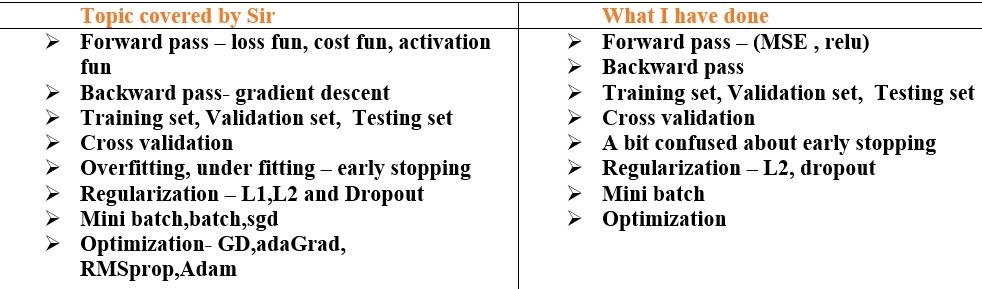

In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import torch.nn.functional as Fun
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler #use for scaling input and output feature
import matplotlib.pyplot as plt #use for plotting
import seaborn as sns #use for data visualization
from torch.utils.data import DataLoader,ConcatDataset  #use for creating train,test and validation data loader 
from sklearn.model_selection import KFold

# description for imported Libraries:
1) MinMaxScaler is used for scaling input and output feature.

2)matplotlib.pyplot is used for plotting different figure.

3) Seaborn is another plotting library which helps us to visualize data.

4) from torch.utils.data we import Dataloader for creating train,test and validation data loader and ConcatDataset helps us to concat dataset

5)for kflod validation I have used sklearn.model_selection  import kfold


First of All, I have imported necessary libraries. Then I have loaded my dataset. Fortunately I did not need to pre-process my dataset,consequently I direct scale my dataset by using MinMaxScaler.
Then I have plotted close price keeping date on x-axis and close price on y-axis!

My target coloum is 'Close'.

My input features are 'Open','High','Low','Adj Close' and 'Volume'.



In [ ]:
#data loading
df = pd.read_csv("/content/my_dataset.csv")
print(df.shape)
print(df.head())

#In my dataset I have 7 coloumns and I have used 5 coloumns as features (Open,High,Low,Adj Close, Volume)
# Close is my target and I have dropped date from my dataset
#Total number of tuple is: 4326

(4326, 7)
       Date         Open         High          Low        Close    Adj Close  \
0  1/3/2005  2184.750000  2191.600098  2148.719971  2152.149902  2152.149902   
1  1/4/2005  2158.310059  2159.639893  2100.560059  2107.860107  2107.860107   
2  1/5/2005  2102.899902  2116.750000  2091.239990  2091.239990  2091.239990   
3  1/6/2005  2098.510010  2103.899902  2088.030029  2090.000000  2090.000000   
4  1/7/2005  2099.949951  2103.389893  2076.689941  2088.610107  2088.610107   

       Volume  
0  2193130000  
1  2690460000  
2  2375380000  
3  2174220000  
4  2191910000  


In [ ]:
#hyper parameters
num_epoch = 50
batch_size= 4
learning_rate = 0.05

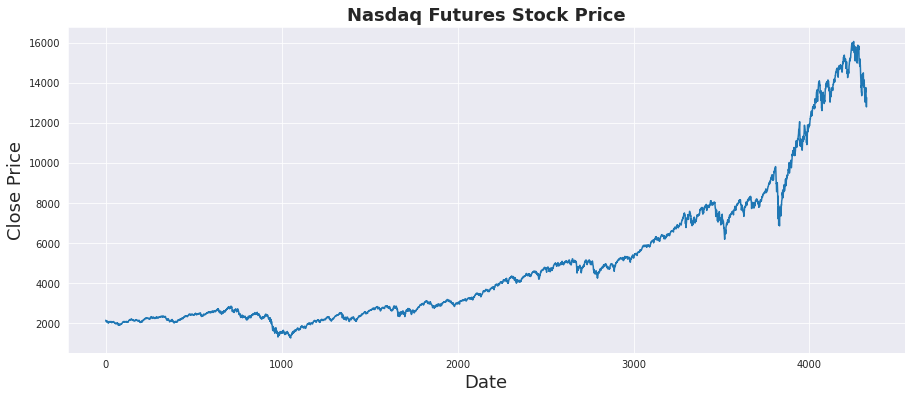

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,6))
plt.plot(df[['Close']])
plt.title("Nasdaq Futures Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()


In [ ]:
#data preprocessing
input = df.drop(['Date','Close'],axis=1)
output=df[['Close']]
input.head()
print(output.shape)
print(input.shape)

(4326, 1)
(4326, 5)


In [ ]:
sc = MinMaxScaler()
feature =sc.fit_transform(input)
#print(f'print features after scaling :\n \n {feature}')

In [ ]:
target = sc.fit_transform(output)
#print(f'print target after scaling :\n \n {target}')

After scaling , I have splited my datset into train and test (x_train,y_train,x_test and y_test). And then I have splited my train dataset into train and validation dataset (x_train,y_train, x_val and y_val) . 

Here I set random state= 42. 

random_state can be any number which helps us to reuse train-test split !!

Hence, I convert my x_train,y_train,x_test,y_test,x_val and y_val into tensor using torch.Tensor()

Then I have created a custom dataset class and create 3 CustomDataset train_dataset, test_dataset and validation dataset. 

Then take 3 dataloader object train dataloader, test dataloader and validation loader !

# Train dataloader, validation dataloader later help me to run train and validation loop !

In [ ]:
#split dataset into train,test and validation 

x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.15,random_state=34) 
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.10,random_state=34)

print(f'print sahpe of train feature: (x_train): {x_train.shape}')
print(f'print sahpe of train target: (y_train): {y_train.shape}')
print(f'print sahpe of test feature: (x_test): {x_test.shape}')
print(f'print sahpe of test target: (y_test): {y_test.shape}')
print(x_val.shape)
print(y_val.shape)
print(df.shape)

print sahpe of train feature: (x_train): (3309, 5)
print sahpe of train target: (y_train): (3309, 1)
print sahpe of test feature: (x_test): (649, 5)
print sahpe of test target: (y_test): (649, 1)
(368, 5)
(368, 1)
(4326, 7)


In [ ]:
#convert numpy to tensor
x_train= torch.Tensor(x_train)
x_test= torch.Tensor(x_test)
y_train= torch.Tensor(y_train)
y_test= torch.Tensor(y_test)

x_val = torch.Tensor(x_val)
y_val = torch.Tensor(y_val)

In [ ]:
#let's create my customdatase and trainloader so that I can use train data, test data , validation data individually whenever I need: 
class CustomDataset:
  def __init__(self,data,targets):
    self.data = data
    self.targets = targets
    

  def __len__(self):
    return len(self.data)

  '''def __getitem__(self,idx):
    current_sample = self.data[idx, :]
    current_target = self.targets[idx]
    return {
      "sample": torch.tensor(current_sample, dtype=torch.float),
      "target": torch.tensor(current_target, dtype=torch.long)  
    }'''
  def __getitem__(self, index):
        return self.data[index], self.targets[index]

train_dataset = CustomDataset(data=x_train, targets = y_train)
test_dataset = CustomDataset(data=y_train, targets = y_test)
val_dataset = CustomDataset(data=x_val, targets = y_val)

In [ ]:
#data loader
train_loader = DataLoader(dataset=train_dataset, batch_size =batch_size,shuffle =True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


# I have used this simple neural network with 2 hidden layers, one input layer with 5 features (open, high, Low, Adj Close and Volume) and one output layer (predicting output) !

I have created a simple neural network model and a dropout model.


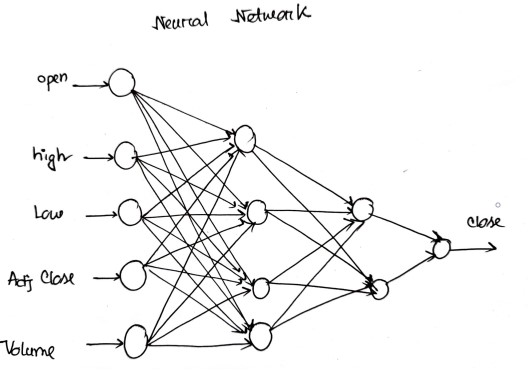

#Description of model creation
In this neural network class, I have declared 2 function.
1)	def __init__()
2)	def forward()
__init__() is a constructors which is used to initialize the object’s state. Here, I have taken a nn.Module ‘s object NeuralNetwork(nn.Module). 
super(NeuralNetwork,self).__init__() is a subclass of nn.Module and is inheriting all methods.
Here,first parameter of super function comes from class name (NeuralNetwork).

Self.hid1 denotes hidden layer between input layer to first hidden layer which 5 features and provide result as 4 outputs and then I have passed 4 outputs as input of 1st hidden layer and it provides 2 outputs and those 2 outputs pass to 2nd hidden layer as input and finally get 1 output.
  #self.hid1 = nn.Linear(5, 4)  

  #self.hid2 = nn.Linear(4, 2) 

   #self.out= nn.Linear(2, 1)

In forward function I use relu activation function between hidden 1 and  hidden layer 2 and in output layer 

I don't use any activation function !

Hence, I have created an object of NeuralNetwork class


In [ ]:
#define network
########## Declaration and network creation #################
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.hid1 = nn.Linear(5, 4)  
    self.hid2 = nn.Linear(4, 2)
    self.out= nn.Linear(2, 1)

    #define activation function
  
  #forward pass
  def forward(self,x):
    #self.sigmoid = nn.Sigmoid()
    relu = nn.ReLU()
    y_pred = relu(self.hid1(x))
    y_pred = relu(self.hid2(y_pred))
    output=self.out(y_pred)
    
    return output


model = NeuralNetwork()
model.to(device)
print(model)
#print(NeuralNetwork)
#print(df.describe())
#print(type(df['TRADE']))

NeuralNetwork(
  (hid1): Linear(in_features=5, out_features=4, bias=True)
  (hid2): Linear(in_features=4, out_features=2, bias=True)
  (out): Linear(in_features=2, out_features=1, bias=True)
)


In [ ]:
#define a network with dropout
class DropoutNetwork(nn.Module):
  def __init__(self):
    super(DropoutNetwork, self).__init__()
    self.hid1 = nn.Linear(5, 15)  
    self.drop1=nn.Dropout(0.25)
    self.hid2 = nn.Linear(15, 20)
    self.drop2=nn.Dropout(0.25)
    self.hid3= nn.Linear(20, 10)
    self.drop3=nn.Dropout(0.25)
    self.out=nn.Linear(10,1)

  def forward(self,x):
    relu=nn.ReLU()
    y_pred=relu(self.hid1(x))
    y_pred=self.drop1(y_pred)
    y_pred=relu(self.hid2(y_pred))
    y_pred=self.drop2(y_pred)
    y_pred=relu(self.hid3(y_pred))
    y_pred=self.drop3(y_pred)
    out=self.out(y_pred)

    return out


model_drop = DropoutNetwork()
model_drop.to(device)
print(model_drop)


DropoutNetwork(
  (hid1): Linear(in_features=5, out_features=15, bias=True)
  (drop1): Dropout(p=0.25, inplace=False)
  (hid2): Linear(in_features=15, out_features=20, bias=True)
  (drop2): Dropout(p=0.25, inplace=False)
  (hid3): Linear(in_features=20, out_features=10, bias=True)
  (drop3): Dropout(p=0.25, inplace=False)
  (out): Linear(in_features=10, out_features=1, bias=True)
)


In [ ]:
##### Define loss and optimizer #########

criterion= nn.MSELoss()

def select_optimizer(optimizer_name,l_r,w_d):
  if optimizer_name == 'SGD':
    return torch.optim.SGD(model.parameters(), lr =l_r, weight_decay=w_d )
  elif optimizer_name == 'Adam':
    return torch.optim.SGD(model.parameters(), lr =l_r, weight_decay=w_d )
  elif optimizer_name == 'RMSprop':
    return torch.optim.RMSprop(model.parameters(), lr=l_r,weight_decay=w_d)
    


#I can use momentum in SGD,Implements stochastic gradient descent!
#optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
#In gradient descent weight updates once after seeing whole dataset,make larger jump
#SGD updates weight seeing each datapoint but it creates a bit problem (up down based on each datapoint)
#mini-batch : update weight after few datapoint
#Adagrad: update weights based on step (monotonic increase) :
#Adam : Initially slow then it can increase its movement

#SO,which one is best ! No one/Everyone actually it depends on problem

In [ ]:
#I have declare a dictionary where I take two empty list. 

loss_stats = {
    'train': [],
    "val": []
}

Now, I will run training and validation loop !

For traning I have taken a function (train_loop). This train_loop function can take 4 arguments.(optimizer, learning rate, weight delay, model). I use here two models. One is normal model and another one is dropout model. 

I use two models because I wanted find out if I regularize the model,it can minimize error or not ! I run training loop for 3 optimizers 'Adam','RMSprop' and 'SGD'. For distinguish dropout and model error, I plot dropout model's error with purple color and for normal neural network model I use red color.

In training, among 3 optimizer SGD works best for neural network model and the error is accounted for 0.05596. In comparison with SGD,Adam optimizer's error is close to SGD which is 0.05598.Likewise RMSprop shows almost same performance which is 0.05864.
Moreover, 3 optimizers (SGD, Adam, RMSprop) provide almost same error for dropout model in training which is accounted for 0.38334,0.38507,0.38426 respectively. 

Generally, for different optimizers we get different output. However, for this stock dataset I get almost same result for all optimizers. In my view, I claim stock data is sequential and very unstable. If i can use a memory, I will get better result.

I use L2 regularization here which I pass along with optimizer in select_optimizer function.




In [ ]:
#help me allah
print("Begin training.")
total_loss = []
no_epoch=[]

def train_loop(optimizer_name,l_r,w_d,model):
  optimizer = select_optimizer(optimizer_name,l_r,w_d)
  
  for epoch in range(num_epoch):  
    # TRAINING
    train_epoch_loss = 0
    model.train()
    for X, y in train_loader:
        #X, y = X.to(device), y.to(device)
        optimizer.zero_grad()        
        y_train_pred = model(X)      
        train_loss = criterion(y_train_pred, y)
        train_epoch_loss += train_loss.item()
         
       # no_epoch.append(epoch)
        train_loss.backward()
        optimizer.step() #Helps to Update paremeters
    lo =train_epoch_loss/len(train_loader)
    total_loss.append(lo)           
   
    no_epoch.append(epoch)    
  loss_stats['train'].append(train_epoch_loss/len(train_loader))
  #loss_stats['val'].append(val_epoch_loss/len(val_loader))                              
  #print(f'Epoch {0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f}')
  print(f'Epoch {0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f}')
  print(total_loss)
 

Begin training.


In [ ]:
train_loop('SGD',0.05,0.001,model)


Epoch 000: | Train Loss: 0.05596
[0.056339659848461905, 0.05575944440369607, 0.05577415433950758, 0.05594265224650538, 0.05569198898743874, 0.05595585044416045, 0.055979796222710286, 0.0557023226649046, 0.05584729483895508, 0.05583008016352227, 0.05575509845101441, 0.05598600395171451, 0.05577100711876913, 0.055614172470033765, 0.05593466504196049, 0.05585526468517407, 0.0558632616997485, 0.0557267087094704, 0.05570697517765254, 0.05621519371833999, 0.05580188123217406, 0.05594465765733146, 0.055728740223339235, 0.05607605628345324, 0.05571485339770215, 0.055973737130342566, 0.05583415736011533, 0.055634489114529, 0.055831011548944286, 0.05577758954679605, 0.055913951443080846, 0.05556870532916876, 0.05575190818177397, 0.05589704573770832, 0.05570620042665587, 0.05602081742279042, 0.05598091901024659, 0.05594463528548412, 0.05559575973809157, 0.055972452315244295, 0.05576363526164343, 0.055921655217442065, 0.0558372425295716, 0.05577500941250687, 0.055794695211301114, 0.055798800422158

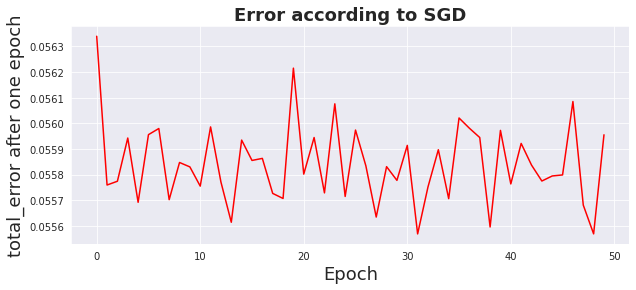

In [ ]:

sns.set_style("darkgrid")
plt.figure(figsize = (10,4))
plt.plot(no_epoch,total_loss,color='red')
plt.title("Error according to SGD",fontsize=18, fontweight='bold')
plt.xlabel('Epoch',fontsize=18)
plt.ylabel('total_error after one epoch',fontsize=18)
plt.show()

Epoch 000: | Train Loss: 0.38677
[0.3860475645459073, 0.38528763601817373, 0.38550493214729326, 0.3879775058406131, 0.38653823863804915, 0.385960602376988, 0.3844653768149983, 0.38506884028874155, 0.38646325780357715, 0.3849607838254764, 0.38502732298116465, 0.3850495051412623, 0.38573872370888357, 0.38708005428026265, 0.38524940376876343, 0.3857332060590458, 0.38683666853945037, 0.386541321342766, 0.38602320660031647, 0.38188571109467945, 0.3845232252013568, 0.3856217245242878, 0.38672607527046965, 0.3850922630244983, 0.38703507868852016, 0.3869875840446799, 0.3849178973387405, 0.3837758551131268, 0.38700352538970934, 0.3864225769496482, 0.38671653810438616, 0.38775447891026305, 0.3851808245847191, 0.3861752617114408, 0.38429495125361113, 0.38662857303152914, 0.38518391866326906, 0.3852830889504313, 0.3844915520363816, 0.38395882223323347, 0.386034797616123, 0.3836707723943364, 0.38538219313618644, 0.38709367442750126, 0.383095829959077, 0.3864595327472341, 0.3863835694619279, 0.38543

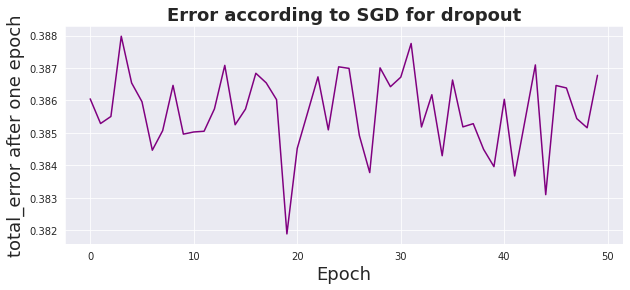

In [ ]:
train_loop('SGD',0.05,0.001,model_drop)


sns.set_style("darkgrid")
plt.figure(figsize = (10,4))
plt.plot(total_loss,color='purple')
plt.title("Error according to SGD for dropout",fontsize=18, fontweight='bold')
plt.xlabel('Epoch',fontsize=18)
plt.ylabel('total_error after one epoch',fontsize=18)
plt.show()


Epoch 000: | Train Loss: 0.05598
[0.05598214304846248, 0.05572859270916858, 0.055808907291277035, 0.056119000898974446, 0.0557227962579216, 0.05592869951875919, 0.05585744519427516, 0.05587842107631248, 0.056093022422297016, 0.055933940144208515, 0.05580312860008239, 0.05571776234706783, 0.055786266385540434, 0.05581181635180317, 0.05581264056004966, 0.05596346621978623, 0.0558716488587625, 0.05575731582011677, 0.05594973594716813, 0.05577141334300474, 0.055875608614861856, 0.05573548445882161, 0.05623901061880164, 0.055841272756466324, 0.055769664312952986, 0.055887520698080256, 0.05585224248957033, 0.055821247033297945, 0.05622322937633374, 0.05600014707362639, 0.05584911702331245, 0.05547982500036526, 0.05574895491781937, 0.055833800400017904, 0.05589626280502034, 0.055927348610408524, 0.05587006570233689, 0.05585756011060911, 0.055704939073603486, 0.05604742647537845, 0.05592658311696071, 0.05585416032472099, 0.055929717822595114, 0.05591010606278562, 0.05608437819533491, 0.0556487

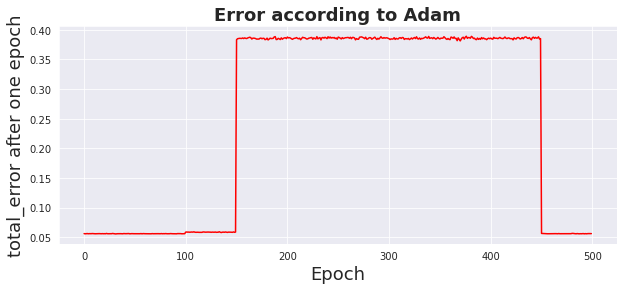

In [ ]:
train_loop('Adam',0.05,0.001,model)


sns.set_style("darkgrid")
plt.figure(figsize = (10,4))
plt.plot(total_loss,color='red')
plt.title("Error according to Adam",fontsize=18, fontweight='bold')
plt.xlabel('Epoch',fontsize=18)
plt.ylabel('total_error after one epoch',fontsize=18)
plt.show()


Epoch 000: | Train Loss: 0.38507
[0.05598214304846248, 0.05572859270916858, 0.055808907291277035, 0.056119000898974446, 0.0557227962579216, 0.05592869951875919, 0.05585744519427516, 0.05587842107631248, 0.056093022422297016, 0.055933940144208515, 0.05580312860008239, 0.05571776234706783, 0.055786266385540434, 0.05581181635180317, 0.05581264056004966, 0.05596346621978623, 0.0558716488587625, 0.05575731582011677, 0.05594973594716813, 0.05577141334300474, 0.055875608614861856, 0.05573548445882161, 0.05623901061880164, 0.055841272756466324, 0.055769664312952986, 0.055887520698080256, 0.05585224248957033, 0.055821247033297945, 0.05622322937633374, 0.05600014707362639, 0.05584911702331245, 0.05547982500036526, 0.05574895491781937, 0.055833800400017904, 0.05589626280502034, 0.055927348610408524, 0.05587006570233689, 0.05585756011060911, 0.055704939073603486, 0.05604742647537845, 0.05592658311696071, 0.05585416032472099, 0.055929717822595114, 0.05591010606278562, 0.05608437819533491, 0.0556487

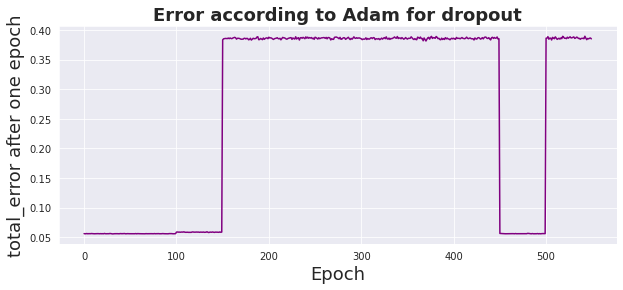

In [ ]:
train_loop('Adam',0.05,0.001,model_drop)


sns.set_style("darkgrid")
plt.figure(figsize = (10,4))
plt.plot(total_loss,color='purple')
plt.title("Error according to Adam for dropout",fontsize=18, fontweight='bold')
plt.xlabel('Epoch',fontsize=18)
plt.ylabel('total_error after one epoch',fontsize=18)
plt.show()


In [ ]:
train_loop('RMSprop',0.05,0.001,model)

Epoch 000: | Train Loss: 0.05864
[0.05598214304846248, 0.05572859270916858, 0.055808907291277035, 0.056119000898974446, 0.0557227962579216, 0.05592869951875919, 0.05585744519427516, 0.05587842107631248, 0.056093022422297016, 0.055933940144208515, 0.05580312860008239, 0.05571776234706783, 0.055786266385540434, 0.05581181635180317, 0.05581264056004966, 0.05596346621978623, 0.0558716488587625, 0.05575731582011677, 0.05594973594716813, 0.05577141334300474, 0.055875608614861856, 0.05573548445882161, 0.05623901061880164, 0.055841272756466324, 0.055769664312952986, 0.055887520698080256, 0.05585224248957033, 0.055821247033297945, 0.05622322937633374, 0.05600014707362639, 0.05584911702331245, 0.05547982500036526, 0.05574895491781937, 0.055833800400017904, 0.05589626280502034, 0.055927348610408524, 0.05587006570233689, 0.05585756011060911, 0.055704939073603486, 0.05604742647537845, 0.05592658311696071, 0.05585416032472099, 0.055929717822595114, 0.05591010606278562, 0.05608437819533491, 0.0556487

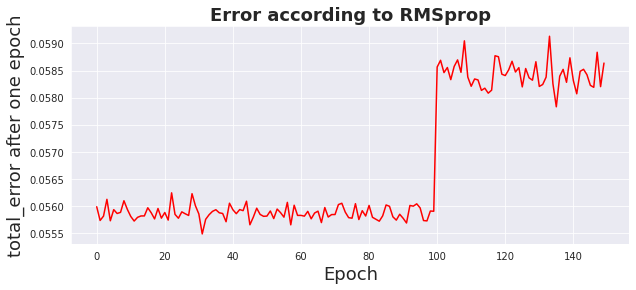

In [ ]:
#plotting
sns.set_style("darkgrid")
plt.figure(figsize = (10,4))
plt.plot(total_loss,color='red')
plt.title("Error according to RMSprop",fontsize=18, fontweight='bold')
plt.xlabel('Epoch',fontsize=18)
plt.ylabel('total_error after one epoch',fontsize=18)
plt.show()

Epoch 000: | Train Loss: 0.38426
[0.05598214304846248, 0.05572859270916858, 0.055808907291277035, 0.056119000898974446, 0.0557227962579216, 0.05592869951875919, 0.05585744519427516, 0.05587842107631248, 0.056093022422297016, 0.055933940144208515, 0.05580312860008239, 0.05571776234706783, 0.055786266385540434, 0.05581181635180317, 0.05581264056004966, 0.05596346621978623, 0.0558716488587625, 0.05575731582011677, 0.05594973594716813, 0.05577141334300474, 0.055875608614861856, 0.05573548445882161, 0.05623901061880164, 0.055841272756466324, 0.055769664312952986, 0.055887520698080256, 0.05585224248957033, 0.055821247033297945, 0.05622322937633374, 0.05600014707362639, 0.05584911702331245, 0.05547982500036526, 0.05574895491781937, 0.055833800400017904, 0.05589626280502034, 0.055927348610408524, 0.05587006570233689, 0.05585756011060911, 0.055704939073603486, 0.05604742647537845, 0.05592658311696071, 0.05585416032472099, 0.055929717822595114, 0.05591010606278562, 0.05608437819533491, 0.0556487

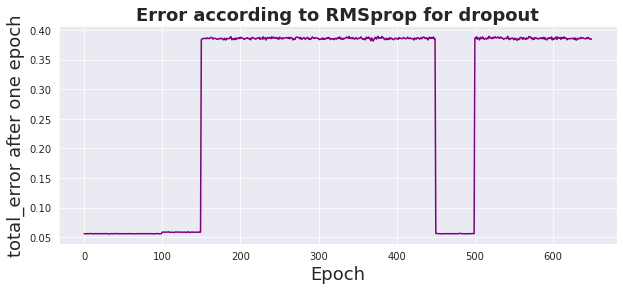

In [ ]:
train_loop('RMSprop',0.05,0.001,model_drop)


sns.set_style("darkgrid")
plt.figure(figsize = (10,4))
plt.plot(total_loss,color='purple')
plt.title("Error according to RMSprop for dropout",fontsize=18, fontweight='bold')
plt.xlabel('Epoch',fontsize=18)
plt.ylabel('total_error after one epoch',fontsize=18)
plt.show()


In [ ]:
#Optimizartion analysis based on training loss:
# By using same learing rate,weight decay I get almost same error for SGD(0.47478) ,Adam(0.47745) and RMSprop(0.47718)

Validation

For validation, I have taken a function (validation_loop). This validation_loop function can take 4 arguments.(optimizer, learning rate, weight delay, model). I use here two models. One is normal model and another one is dropout model. I run training loop for 3 optimizers 'Adam','RMSprop' and 'SGD'. For distinguish dropout and model error, I plot dropout model's error with purple color and for normal neural network model I use Red color.

In validation, among 3 optimizers work same for neural network model and the error is accounted for 0.06909.

Apart from this, when I use dropout model, 3 optimizers (SGD, Adam, RMSprop) provide exactly same error in validation which is accounted for 0.39255.

In [ ]:
 # VALIDATION    

 Total_vLoss=[]
 def validation_loop(optimizer_name,l_r,w_d,model):
  optimizer = select_optimizer(optimizer_name,l_r,w_d)
  for epoch in range(num_epoch):
    with torch.no_grad():      
     val_epoch_loss = 0        
     model.eval()
     for X_val_batch, y_val_batch in val_loader:
      X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)       
      y_val_pred = model(X_val_batch)                     
      val_loss = criterion(y_val_pred, y_val_batch)         
      val_epoch_loss += val_loss.item()
      

    val_loss =val_epoch_loss/len(val_loader)
    Total_vLoss.append(val_loss)

  print(f'Epoch {0:03}: | Validation Loss: {val_epoch_loss/len(val_loader):.5f}')
  print(f'Print validation loss is {Total_vLoss}: .5f')
  return val_loss
  
    

Epoch 000: | Validation Loss: 0.06909
Print validation loss is [0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.0690878576

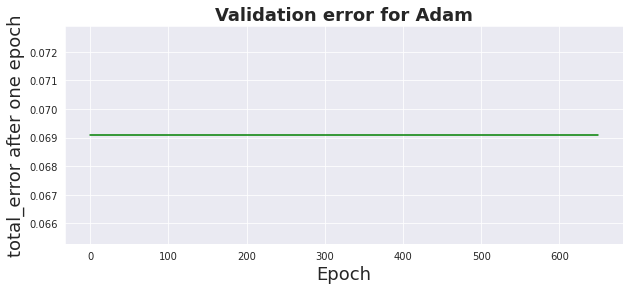

In [ ]:
validation_loop('Adam',0.05,0.001,model)

#plotting
sns.set_style("darkgrid")
plt.figure(figsize = (10,4))
plt.plot(Total_vLoss,color='GREEN')
plt.title("Validation error for Adam",fontsize=18, fontweight='bold')
plt.xlabel('Epoch',fontsize=18)
plt.ylabel('total_error after one epoch',fontsize=18)
plt.show()


Epoch 000: | Validation Loss: 0.39255
Print validation loss is [0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.0690878576

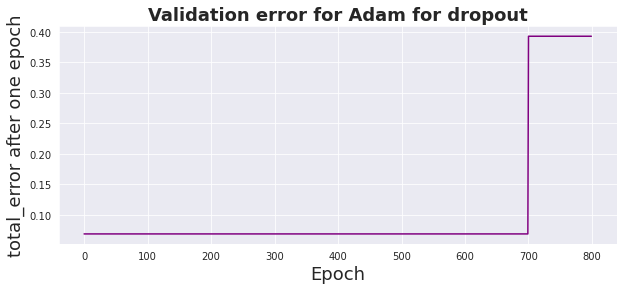

In [ ]:
validation_loop('Adam',0.05,0.001,model_drop)

#plotting
sns.set_style("darkgrid")
plt.figure(figsize = (10,4))
plt.plot(Total_vLoss,color='purple')
plt.title("Validation error for Adam for dropout",fontsize=18, fontweight='bold')
plt.xlabel('Epoch',fontsize=18)
plt.ylabel('total_error after one epoch',fontsize=18)
plt.show()


Epoch 000: | Validation Loss: 0.06909
Print validation loss is [0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.0690878576

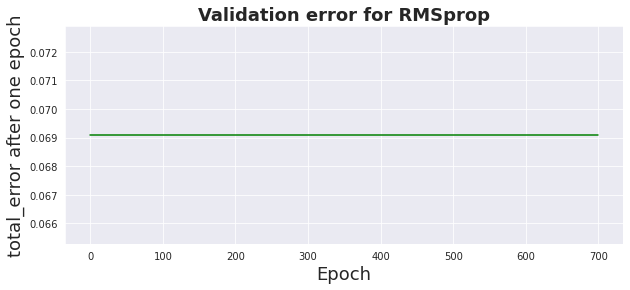

In [ ]:

validation_loop('RMSprop',0.05,0.001,model)

#plotting
sns.set_style("darkgrid")
plt.figure(figsize = (10,4))
plt.plot(Total_vLoss,color='GREEN')
plt.title("Validation error for RMSprop",fontsize=18, fontweight='bold')
plt.xlabel('Epoch',fontsize=18)
plt.ylabel('total_error after one epoch',fontsize=18)
plt.show()


Epoch 000: | Validation Loss: 0.39255
Print validation loss is [0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.0690878576

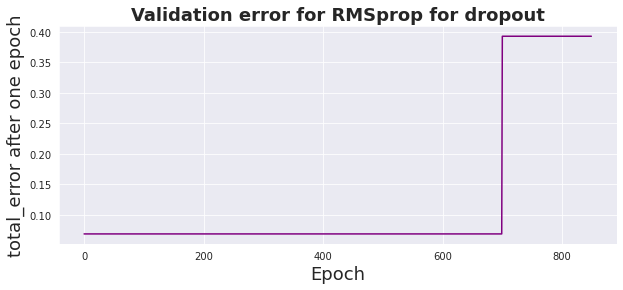

In [ ]:

validation_loop('RMSprop',0.05,0.001,model_drop)

#plotting
sns.set_style("darkgrid")
plt.figure(figsize = (10,4))
plt.plot(Total_vLoss,color='purple')
plt.title("Validation error for RMSprop for dropout",fontsize=18, fontweight='bold')
plt.xlabel('Epoch',fontsize=18)
plt.ylabel('total_error after one epoch',fontsize=18)
plt.show()


Epoch 000: | Validation Loss: 0.06909
Print validation loss is [0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.0690878576

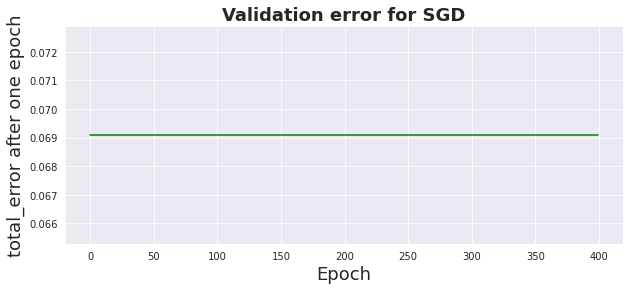

In [ ]:
validation_loop('SGD',0.05,0.001,model)

#plotting
sns.set_style("darkgrid")
plt.figure(figsize = (10,4))
plt.plot(Total_vLoss,color='GREEN')
plt.title("Validation error for SGD",fontsize=18, fontweight='bold')
plt.xlabel('Epoch',fontsize=18)
plt.ylabel('total_error after one epoch',fontsize=18)
plt.show()


Epoch 000: | Validation Loss: 0.39255
Print validation loss is [0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.06908785768926305, 0.0690878576

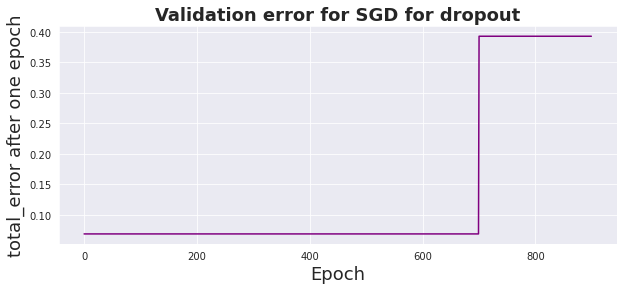

In [ ]:
validation_loop('SGD',0.05,0.001,model_drop)

#plotting
sns.set_style("darkgrid")
plt.figure(figsize = (10,4))
plt.plot(Total_vLoss,color='purple')
plt.title("Validation error for SGD for dropout",fontsize=18, fontweight='bold')
plt.xlabel('Epoch',fontsize=18)
plt.ylabel('total_error after one epoch',fontsize=18)
plt.show()


In [ ]:
# k fold dataset

For k-fold validation I concat train and validation dataset together. I take 3 folds which declare at k_folds variable.
I have taken a kfold object where i pass no of fold and I keep shuffle true so that after taking one fold, it can shuffle remaining dataset.

After each fold I reset weights again!

Then, I run a loop on kfold_dataset.

Then plot kfold loss !

In [ ]:
kfold_dataset= ConcatDataset([train_dataset,val_dataset])
k_folds=3
kfold=KFold(n_splits=k_folds,shuffle=True)
num_epochs=5
l= nn.MSELoss()

results ={} #fold results

torch.manual_seed(42)

print('------- start fold --------')

------- start fold --------


In [ ]:
def reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
   if hasattr(layer, 'reset_parameters'):
    print(f'Reset trainable parameters of layer = {layer}')
    layer.reset_parameters()

In [ ]:

#k fold validation

k_fold_loss = []
no_epoch = []

for train_f,test_f in kfold.split(kfold_dataset):
  print("TRAIN:", train_f.shape, "TEST:", test_f.shape)
  train_subsampler = torch.utils.data.SubsetRandomSampler(train_f)
  test_subsampler = torch.utils.data.SubsetRandomSampler(test_f)

  trainloader=DataLoader(dataset=kfold_dataset,batch_size=batch_size,sampler=train_subsampler)
  testloader = DataLoader(dataset=kfold_dataset, batch_size= batch_size, sampler=test_subsampler)
  
  model = NeuralNetwork()
  model.apply(reset_weights)

  optimizer = torch.optim.Adam(model.parameters(), lr = 0.05)
  
  #run the training loop for defined number of epochs
  for epoch in range(num_epochs):
    print(f'print the number of epoch is {epoch+1}')

    current_loss = 0.0 #set current loss value

    for i,(x,y) in enumerate(trainloader):
   #  x,y = data #get inputs

     optimizer.zero_grad() #zero the gradients

     y_pred = model_drop(x) #forward pass
     loss = l(y_pred,y)
     current_loss+=loss.item()

     loss.backward()
 
     optimizer.step()
     no_epoch.append(epoch)
     if i%50 == 0:
       print(f'loss : {current_loss}')

       current_loss =0.0
    k_loss=current_loss/len(trainloader)
    k_fold_loss.append(k_loss)

     #print('process is complete')
print('list of k-fold-loss:',k_fold_loss)

  

TRAIN: (2451,) TEST: (1226,)
Reset trainable parameters of layer = Linear(in_features=5, out_features=4, bias=True)
Reset trainable parameters of layer = Linear(in_features=4, out_features=2, bias=True)
Reset trainable parameters of layer = Linear(in_features=2, out_features=1, bias=True)
print the number of epoch is 1
loss : 0.28443166613578796
loss : 18.437201857566833
loss : 20.61535282433033
loss : 18.618150144815445
loss : 21.496575564146042
loss : 19.46094010770321
loss : 19.12621869146824
loss : 17.20621582865715
loss : 19.054164558649063
loss : 18.932717695832253
loss : 20.27051717042923
loss : 20.50198967754841
loss : 16.90157462656498
print the number of epoch is 2
loss : 0.6404603719711304
loss : 21.09608981013298
loss : 19.8199695199728
loss : 18.84089633822441
loss : 19.342599168419838
loss : 16.263230621814728
loss : 18.221578299999237
loss : 18.891437023878098
loss : 17.636155411601067
loss : 18.066825792193413
loss : 21.135670378804207
loss : 19.58112296462059
loss : 20

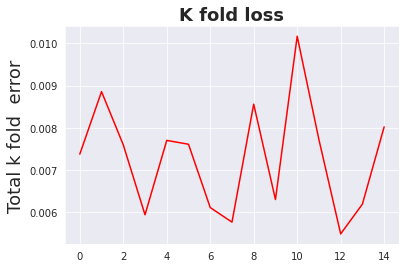

In [ ]:
plt.plot(k_fold_loss,color='red')
plt.title("K fold loss",fontsize=18, fontweight='bold')
#plt.xlabel('Number of epoch',fontsize=18)
plt.ylabel('Total k fold  error',fontsize=18)
plt.show()